In [1]:
import pandas as pd

In [2]:
co = pd.read_csv("colorado.csv")

In [3]:
ut = pd.read_csv("utah.csv")

In [4]:
len(co)

9089

In [5]:
len(ut)

3030

In [4]:
from collections import Counter
Counter(" ".join(co["body"]).split()).most_common(100)

[('the', 57694),
 ('to', 35422),
 ('a', 32845),
 ('and', 30733),
 ('in', 24723),
 ('of', 23754),
 ('i', 19073),
 ('is', 16677),
 ('for', 14922),
 ('that', 14136),
 ('it', 11360),
 ('you', 10069),
 ('on', 9801),
 ('with', 8587),
 ('are', 8403),
 ('but', 8213),
 ('have', 7999),
 ('be', 7763),
 ('as', 6781),
 ('at', 6296),
 ('not', 6087),
 ('if', 5847),
 ('my', 5841),
 ('they', 5784),
 ('or', 5718),
 ('this', 5409),
 ('an', 5301),
 ('from', 5250),
 ('|', 5206),
 ('was', 5074),
 ('so', 4911),
 ('colorado', 4848),
 ('will', 4625),
 ('more', 4527),
 ('would', 4281),
 ('we', 4265),
 ('like', 3993),
 ('can', 3974),
 ('just', 3890),
 ('get', 3790),
 ('about', 3764),
 ('has', 3626),
 ('than', 3563),
 ('all', 3514),
 ('by', 3354),
 ('ev', 3353),
 ('car', 3295),
 ("it's", 3198),
 ('electric', 3162),
 ('up', 3090),
 ('there', 3034),
 ('their', 2974),
 ('your', 2966),
 ('-', 2963),
 ('one', 2939),
 ('when', 2798),
 ('do', 2791),
 ('out', 2784),
 ('new', 2763),
 ('only', 2609),
 ('people', 2525),
 ('

In [5]:
import re
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tavishipriyam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
def clean_text(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)
    text = re.sub('\S*@\S*\s?', '', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub("\'", "", text)
    tokens = text.split()
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens

In [8]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tavishipriyam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
ut['cleanText'] = ut['body'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

<>:1: DeprecationWarning: invalid escape sequence \/
<>:1: DeprecationWarning: invalid escape sequence \/
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_82427/223734391.py:1: DeprecationWarning: invalid escape sequence \/
  ut['cleanText'] = ut['body'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])


In [47]:
ut['cleanText'] = \
ut['cleanText'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
ut['cleanText'] = \
ut['cleanText'].map(lambda x: x.lower())
# Print out the first rows of papers
ut['cleanText'].head()

<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_82427/2032380219.py:2: DeprecationWarning: invalid escape sequence \.
  ut['cleanText'].map(lambda x: re.sub('[,\.!?]', '', x))


0    fta\n\n&gt;caltrain recently passed the halfwa...
1    thanks &amp; fyi  \n\nev news - $idex - buys u...
2    for a trip we only make every two months it is...
3    it looks like a pretty weak correlation you ca...
4    why is no one talking about this company they ...
Name: cleanText, dtype: object

In [163]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['think','drive','need','still','lot','see','work','driving','utah','salt','like','city','states','people','also','state','states','even','much','going','could','go','make','us','evs','like','would','get','one','new','from', 'subject', 're', 'edu', 'use','electric','vehicle','vehicles','car','cars','rt','ev','gt','colorado','co','denver'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
## add electric, vehicle, rts etc in stopwords

In [164]:
udata = ut['cleanText'].values.tolist()
udata_words = list(sent_to_words(udata))
# remove stop words
udata_words = remove_stopwords(udata_words)
print(udata_words[:1][0][:30])

['fta', 'caltrain', 'recently', 'passed', 'halfway', 'mark', 'completing', 'electrification', 'improvement', 'project', 'caltrain', 'stations', 'although', 'delays', 'final', 'completion', 'date', 'possible', 'according', 'agency', 'spokesman', 'caltrain', 'officials', 'trying', 'determine', 'delays', 'affect', 'project', 'completion', 'date']


In [165]:
udata_words

[['fta',
  'caltrain',
  'recently',
  'passed',
  'halfway',
  'mark',
  'completing',
  'electrification',
  'improvement',
  'project',
  'caltrain',
  'stations',
  'although',
  'delays',
  'final',
  'completion',
  'date',
  'possible',
  'according',
  'agency',
  'spokesman',
  'caltrain',
  'officials',
  'trying',
  'determine',
  'delays',
  'affect',
  'project',
  'completion',
  'date',
  'scheduled',
  'caltrain',
  'working',
  'federal',
  'transit',
  'administration',
  'detailed',
  'answers',
  'timeframe',
  'project',
  'completion',
  'date',
  'expects',
  'know',
  'first',
  'quarter',
  'said',
  'agency',
  'spokesman',
  'dan',
  'lieberman',
  'said',
  'pandemic',
  'disrupted',
  'caltrain',
  'supply',
  'lines',
  'construction',
  'preventing',
  'receiving',
  'materials',
  'rebar',
  'cages',
  'used',
  'support',
  'vertical',
  'columns',
  'covid',
  'affected',
  'pacific',
  'gas',
  'company',
  'project',
  'created',
  'restrictions',
  

In [166]:
import gensim.corpora as corpora
# Create Dictionary
uid2word = corpora.Dictionary(udata_words)
# Create Corpus
utexts = udata_words
# Term Document Frequency
ucorpus = [uid2word.doc2bow(text) for text in utexts]
# View
print(ucorpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 4), (14, 4), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 17), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 3), (28, 1), (29, 2)]


In [167]:
import os
import pyLDAvis.gensim_models

In [168]:
from pprint import pprint
# number of topics
num_topics = 15
# Build LDA model
lda_model_u = gensim.models.LdaMulticore(corpus=ucorpus,
                                       id2word=uid2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_u.print_topics())
doc_lda = lda_model_u[ucorpus]

[(0,
  '0.004*"charging" + 0.004*"energy" + 0.004*"lake" + 0.003*"many" + '
  '0.003*"miles" + 0.003*"time" + 0.003*"power" + 0.003*"solar" + 0.003*"way" '
  '+ 0.003*"tesla"'),
 (1,
  '0.007*"gas" + 0.005*"way" + 0.004*"trump" + 0.004*"miles" + 0.004*"said" + '
  '0.004*"tax" + 0.004*"charging" + 0.004*"charge" + 0.004*"trip" + '
  '0.004*"far"'),
 (2,
  '0.004*"power" + 0.003*"charge" + 0.003*"miles" + 0.003*"live" + '
  '0.003*"california" + 0.003*"time" + 0.003*"charging" + 0.003*"gas" + '
  '0.003*"chargers" + 0.003*"well"'),
 (3,
  '0.005*"tesla" + 0.003*"good" + 0.003*"live" + 0.003*"less" + 0.003*"time" + '
  '0.003*"charging" + 0.003*"miles" + 0.002*"gas" + 0.002*"california" + '
  '0.002*"used"'),
 (4,
  '0.009*"trump" + 0.004*"clinton" + 0.003*"gas" + 0.003*"tesla" + '
  '0.003*"solar" + 0.003*"way" + 0.003*"vote" + 0.003*"want" + 0.003*"said" + '
  '0.003*"electoral"'),
 (5,
  '0.006*"tesla" + 0.005*"tax" + 0.004*"year" + 0.003*"less" + 0.003*"miles" + '
  '0.003*"pay" + 0.

In [169]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('fol'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model_u, ucorpus, uid2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'fol'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.013416  0.019404       1        1  13.025203
11     0.003945  0.049678       2        1  11.405052
5     -0.035904 -0.009143       3        1   8.563857
8      0.040822 -0.023888       4        1   8.457919
6      0.023943  0.007975       5        1   8.207729
14     0.005150  0.010115       6        1   7.631882
4      0.019858 -0.014527       7        1   7.475893
10    -0.014078  0.001675       8        1   6.555450
2      0.006004 -0.002153       9        1   6.068755
0     -0.011302  0.010988      10        1   5.414429
3     -0.018984  0.009369      11        1   4.026304
9     -0.026951 -0.004668      12        1   3.888376
7      0.017692  0.005811      13        1   3.311995
12    -0.028107 -0.018976      14        1   3.264261
13     0.004498 -0.041661      15        1   2.702895, topic_info=         Term        Freq       Total Category  logprob  loglift
278     trump  590.000000  590.000000  Default  30.0000  30.0000
2926  clinton  333.000000  333.000000  Default  29.0000  29.0000
998       fee  239.000000  239.000000  Default  28.0000  28.0000
1569   annual  168.000000  168.000000  Default  27.0000  27.0000
129     power  531.000000  531.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
1013     well    8.973484  408.433200  Topic15  -6.3714  -0.2072
334       got    8.215231  281.458272  Topic15  -6.4597   0.0769
2926  clinton    8.274855  333.045741  Topic15  -6.4524  -0.0842
624     right    8.316331  347.746112  Topic15  -6.4474  -0.1224
683      year    8.352222  483.759305  Topic15  -6.4431  -0.4482

[1323 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
4006       4  0.647975  accountability
20745      3  0.511565             aci
11852      1  0.534062   acidification
11852      2  0.016184   acidification
11852      3  0.080918   acidification
...      ...       ...             ...
10490     11  0.307057           yukon
10490     12  0.153528           yukon
6135      10  0.406256           zions
20762      9  0.568720      zuckerberg
7197       5  0.573340              ³ð

[5169 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 12, 6, 9, 7, 15, 5, 11, 3, 1, 4, 10, 8, 13, 14])

## XXXXXXXXXXXXXXXXXX

In [170]:
co['cleanText'] = co['body'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

<>:1: DeprecationWarning: invalid escape sequence \/
<>:1: DeprecationWarning: invalid escape sequence \/
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_82427/3128166904.py:1: DeprecationWarning: invalid escape sequence \/
  co['cleanText'] = co['body'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])


In [64]:
co['cleanText'] = \
co['cleanText'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
co['cleanText'] = \
co['cleanText'].map(lambda x: x.lower())
# Print out the first rows of papers
co['cleanText'].head()

<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
/var/folders/23/nlj2ws3n7mz6my6588wvrlsw0000gn/T/ipykernel_82427/1822146587.py:2: DeprecationWarning: invalid escape sequence \.
  co['cleanText'].map(lambda x: re.sub('[,\.!?]', '', x))


0    i drove a 2013 leaf 25 miles one way in colora...
1    the problem is that incentives skew the origin...
2    in order to keep the timeline as a close-enoug...
3    interesting i asked my leaf dealer in colorado...
4    you're close but i think there will be some bi...
Name: cleanText, dtype: object

In [111]:
a

[('people', 2550),
 ('also', 2322),
 ('tesla', 2315),
 ('state', 2273),
 ('even', 2247),
 ('miles', 2237),
 ('charging', 2088),
 ('think', 1946),
 ('time', 1930),
 ('gas', 1918),
 ('much', 1848),
 ('going', 1807),
 ('year', 1790),
 ('range', 1774),
 ('drive', 1753),
 ('could', 1687),
 ('go', 1665),
 ('states', 1654),
 ('make', 1643),
 ('us', 1640)]

In [171]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['think','drive','need','still','lot','see','work','driving','people','also','state','states','even','much','going','could','go','make','us','evs','like','would','get','one','new','from', 'subject', 're', 'edu', 'use','electric','vehicle','vehicles','car','cars','rt','ev','gt','colorado','co','denver'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
## add electric, vehicle, rts etc in stopwords

In [172]:
data = co['cleanText'].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['drove', 'leaf', 'miles', 'way', 'year', 'years', 'ago', 'made', 'commute', 'mph', 'mostly', 'without', 'issue', 'really', 'cold', 'days', 'worst', 'made', 'charger', 'near', 'three', 'times', 'times', 'charged', 'home', 'overnight', 'iirc', 'mile', 'range', 'kw']


In [173]:
data_words

[['drove',
  'leaf',
  'miles',
  'way',
  'year',
  'years',
  'ago',
  'made',
  'commute',
  'mph',
  'mostly',
  'without',
  'issue',
  'really',
  'cold',
  'days',
  'worst',
  'made',
  'charger',
  'near',
  'three',
  'times',
  'times',
  'charged',
  'home',
  'overnight',
  'iirc',
  'mile',
  'range',
  'kw',
  'hr',
  'battery',
  'charged',
  'easy',
  'battery',
  'estimate',
  'remaining',
  'miles',
  'blank',
  'miles',
  'comfortable',
  'range',
  'power',
  'eats',
  'battery',
  'passing',
  'mindful',
  'spontaneous',
  'changes',
  'plans',
  'involved',
  'miles',
  'time',
  'distance',
  'speed',
  'temperature',
  'reduce',
  'distance',
  'sitting',
  'standstill',
  'jam',
  'costs',
  'nothing',
  'compared',
  'miles',
  'way',
  'comfortable',
  'kw',
  'hr',
  'leaf',
  'battery',
  'commute',
  'wife',
  'liked',
  'drove',
  'distance',
  'another',
  'two',
  'years',
  'sold',
  'tesla',
  'came',
  'along',
  'leaf',
  'rocks',
  'bought',
  'ye

In [174]:
import gensim.corpora as corpora
# Create Dictionary
fid2word = corpora.Dictionary(data_words)
# Create Corpus
ftexts = data_words
# Term Document Frequency
fcorpus = [fid2word.doc2bow(text) for text in ftexts]
# View
print(fcorpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 4), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 1), (16, 3), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 3), (29, 1)]


In [175]:
import os
import pyLDAvis.gensim_models

In [176]:
from pprint import pprint
# number of topics
num_topics = 15
# Build LDA model
lda_model_f = gensim.models.LdaMulticore(corpus=fcorpus,
                                       id2word=fid2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model_f.print_topics())
doc_lda = lda_model_f[fcorpus]

[(0,
  '0.006*"hugo" + 0.005*"wallstreetbets" + 0.004*"comments" + 0.004*"charging" '
  '+ 0.004*"battery" + 0.004*"miles" + 0.003*"way" + 0.003*"charge" + '
  '0.003*"date" + 0.003*"years"'),
 (1,
  '0.005*"year" + 0.005*"tesla" + 0.005*"gas" + 0.004*"tax" + 0.004*"time" + '
  '0.004*"miles" + 0.003*"way" + 0.003*"road" + 0.003*"chargers" + '
  '0.003*"years"'),
 (2,
  '0.005*"tesla" + 0.005*"gas" + 0.004*"solar" + 0.004*"energy" + '
  '0.003*"battery" + 0.003*"range" + 0.003*"years" + 0.003*"miles" + '
  '0.003*"really" + 0.003*"well"'),
 (3,
  '0.003*"want" + 0.003*"good" + 0.003*"well" + 0.003*"tesla" + 0.003*"around" '
  '+ 0.003*"gas" + 0.003*"better" + 0.003*"miles" + 0.003*"time" + '
  '0.003*"ita"'),
 (4,
  '0.006*"tesla" + 0.006*"charging" + 0.005*"leaf" + 0.005*"miles" + '
  '0.004*"good" + 0.004*"tax" + 0.004*"year" + 0.004*"really" + 0.004*"time" + '
  '0.003*"back"'),
 (5,
  '0.005*"miles" + 0.004*"gas" + 0.003*"tax" + 0.003*"back" + 0.003*"way" + '
  '0.003*"got" + 0.003

In [177]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('fol'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model_f, fcorpus, fid2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'fol'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/tavishipriyam/Downloads/ENTER/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.000584 -0.011303       1        1  14.468461
2     -0.005548 -0.001261       2        1  13.198688
4     -0.009171 -0.022235       3        1   9.787040
14    -0.008210 -0.002841       4        1   9.206802
8     -0.004758 -0.012471       5        1   7.292721
9     -0.004676 -0.011678       6        1   6.666790
11     0.006162  0.008427       7        1   6.111857
10    -0.015685  0.000622       8        1   5.884116
0      0.042168 -0.018746       9        1   4.504193
1     -0.002108 -0.005485      10        1   4.502801
12     0.004931  0.006660      11        1   4.463163
5     -0.020078  0.017874      12        1   4.197575
7      0.003627  0.016662      13        1   3.958637
13    -0.007025  0.003649      14        1   3.738211
3      0.020953  0.032127      15        1   2.018947, topic_info=                Term         Freq        Total Category  logprob  loglift
1291            hugo   188.000000   188.000000  Default  30.0000  30.0000
1109             gas  1814.000000  1814.000000  Default  29.0000  29.0000
9287  wallstreetbets   588.000000   588.000000  Default  28.0000  28.0000
32             miles  2113.000000  2113.000000  Default  27.0000  27.0000
59               way  1492.000000  1492.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
64             years    22.686049  1508.611733  Topic15  -6.1842  -0.2946
952              per    18.489754   770.631329  Topic15  -6.3888   0.1726
846           charge    21.755257  1476.391658  Topic15  -6.2261  -0.3149
170             know    20.031346  1150.459028  Topic15  -6.3087  -0.1480
59               way    19.664315  1492.397404  Topic15  -6.3272  -0.4267

[1301 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
10655      1  0.164140    aapl
10655      2  0.065656    aapl
10655      3  0.021885    aapl
10655      4  0.021885    aapl
10655      5  0.164140    aapl
...      ...       ...     ...
10766      9  0.036769  zillow
10766     10  0.036769  zillow
10766     11  0.036769  zillow
10766     12  0.018384  zillow
10766     13  0.018384  zillow

[4765 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 5, 15, 9, 10, 12, 11, 1, 2, 13, 6, 8, 14, 4])

In [72]:
from itertools import chain
x = [["a","b"], ["c"]]
y = list(chain(*x))

In [73]:
y

['a', 'b', 'c']

In [178]:
col = list(chain(*data_words))
utah = list(chain(*udata_words))

In [179]:
len(col)

545020

In [180]:
len(utah)

194170

In [181]:
co_c = Counter(col)

In [182]:
a = co_c.most_common()

In [183]:
a = a[0:20]

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.rcParams["figure.figsize"] = (20,5)

<Figure size 640x480 with 0 Axes>

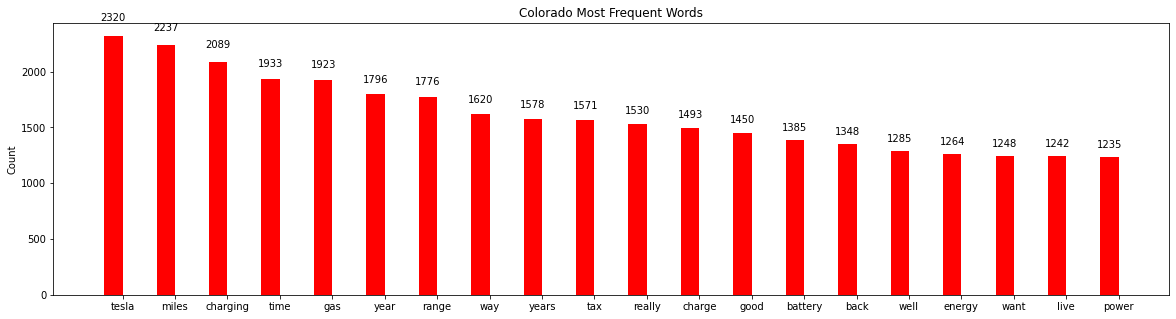

In [185]:
names, values = zip(*a)  # @comment by Matthias
# names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
# values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(a))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, values, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/2.)
ax.set_xticklabels(names)



def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
plt.title("Colorado Most Frequent Words")
plt.show()

In [186]:
ut_c = Counter(utah)

In [187]:
b = ut_c.most_common()

In [188]:
b = b[0:20]

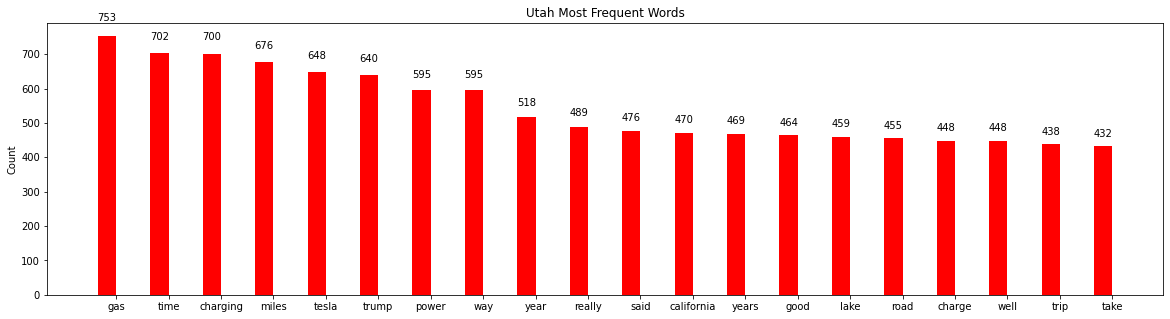

In [189]:
names, values = zip(*b)  # @comment by Matthias
# names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
# values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(b))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, values, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/2.)
ax.set_xticklabels(names)



def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
plt.title("Utah Most Frequent Words")
plt.show()

In [190]:
from wordcloud import WordCloud

In [191]:
col

['drove',
 'leaf',
 'miles',
 'way',
 'year',
 'years',
 'ago',
 'made',
 'commute',
 'mph',
 'mostly',
 'without',
 'issue',
 'really',
 'cold',
 'days',
 'worst',
 'made',
 'charger',
 'near',
 'three',
 'times',
 'times',
 'charged',
 'home',
 'overnight',
 'iirc',
 'mile',
 'range',
 'kw',
 'hr',
 'battery',
 'charged',
 'easy',
 'battery',
 'estimate',
 'remaining',
 'miles',
 'blank',
 'miles',
 'comfortable',
 'range',
 'power',
 'eats',
 'battery',
 'passing',
 'mindful',
 'spontaneous',
 'changes',
 'plans',
 'involved',
 'miles',
 'time',
 'distance',
 'speed',
 'temperature',
 'reduce',
 'distance',
 'sitting',
 'standstill',
 'jam',
 'costs',
 'nothing',
 'compared',
 'miles',
 'way',
 'comfortable',
 'kw',
 'hr',
 'leaf',
 'battery',
 'commute',
 'wife',
 'liked',
 'drove',
 'distance',
 'another',
 'two',
 'years',
 'sold',
 'tesla',
 'came',
 'along',
 'leaf',
 'rocks',
 'bought',
 'years',
 'old',
 'problem',
 'incentives',
 'skew',
 'original',
 'price',
 'many',
 'thr

In [192]:
c = ' '.join(col).lower()

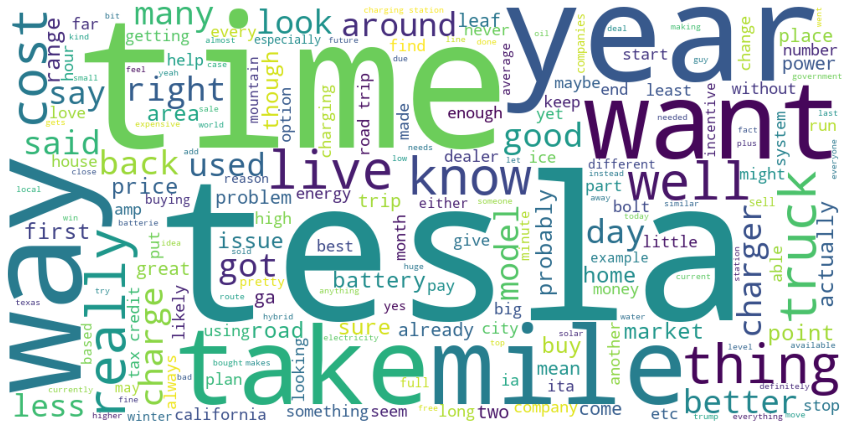

In [193]:
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(c)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [194]:
u = ' '.join(utah).lower()

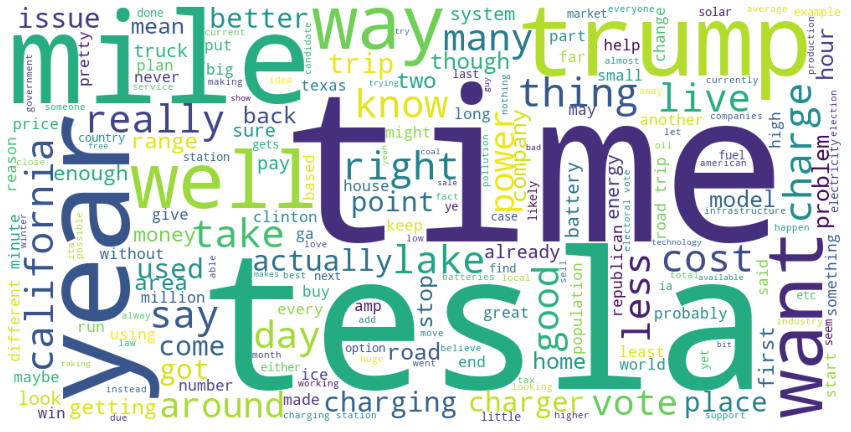

In [195]:
wordcloud = WordCloud(width = 1000, height = 500, background_color='white').generate(u)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [196]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:0000:01

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [197]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tavishipriyam/nltk_data...


In [198]:
a = 'This was a good movie.'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [201]:
co['sent'] = co['cleanText'].apply(lambda review: sid.polarity_scores(review))

In [202]:
co

,Unnamed: 0,author,body,subreddit,score,cleanText,sent
0,2037,Ok_Cantaloupe3793,i drove a 2013 leaf 25 miles one way in colora...,electricvehicles,4.0,i drove a 2013 leaf 25 miles one way in colora...,"{'neg': 0.026, 'neu': 0.918, 'pos': 0.056, 'co..."
1,3986,ToddA1966,the problem is that incentives skew the origin...,electricvehicles,10.0,the problem is that incentives skew the origin...,"{'neg': 0.02, 'neu': 0.83, 'pos': 0.15, 'compo..."
2,4196,SubaruToyotaFan1986,in order to keep the timeline as a close-enoug...,AskReddit,1.0,in order to keep the timeline as a close-enoug...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,5164,ToddA1966,interesting... i asked my leaf dealer in color...,electricvehicles,3.0,interesting... i asked my leaf dealer in color...,"{'neg': 0.028, 'neu': 0.855, 'pos': 0.117, 'co..."
4,5212,california_malice,"you're close, but i think there will be some b...",stocks,1.0,"you're close, but i think there will be some b...","{'neg': 0.019, 'neu': 0.889, 'pos': 0.092, 'co..."
...,...,...,...,...,...,...,...
9084,3139533,MultiSourceNews_Bot,more coverage at:\r\n\r\n\r\n\r\n* [colorado ...,NewsfeedForWork,1.0,more coverage at:\r\n\r\n\r\n\r\n* [colorado ...,"{'neg': 0.0, 'neu': 0.934, 'pos': 0.066, 'comp..."
9085,3145174,fuckyousquirtle,"no offense, but what you said is basically thi...",denvernuggets,3.0,"no offense, but what you said is basically thi...","{'neg': 0.159, 'neu': 0.765, 'pos': 0.076, 'co..."
9086,3145664,stefanrowles96,"same can be said in the us, the uk is about 70...",AskAnAmerican,-4.0,"same can be said in the us, the uk is about 70...","{'neg': 0.0, 'neu': 0.963, 'pos': 0.037, 'comp..."
9087,3145721,aelwero,right... harley davidson is now an entity in ...,electricvehicles,1.0,right... harley davidson is now an entity in ...,"{'neg': 0.037, 'neu': 0.937, 'pos': 0.026, 'co..."


In [203]:
co['compound']  = co['sent'].apply(lambda score_dict: score_dict['compound'])

co.head()

,Unnamed: 0,author,body,subreddit,score,cleanText,sent,compound
0,2037,Ok_Cantaloupe3793,i drove a 2013 leaf 25 miles one way in colora...,electricvehicles,4.0,i drove a 2013 leaf 25 miles one way in colora...,"{'neg': 0.026, 'neu': 0.918, 'pos': 0.056, 'co...",0.8235
1,3986,ToddA1966,the problem is that incentives skew the origin...,electricvehicles,10.0,the problem is that incentives skew the origin...,"{'neg': 0.02, 'neu': 0.83, 'pos': 0.15, 'compo...",0.9772
2,4196,SubaruToyotaFan1986,in order to keep the timeline as a close-enoug...,AskReddit,1.0,in order to keep the timeline as a close-enoug...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,5164,ToddA1966,interesting... i asked my leaf dealer in color...,electricvehicles,3.0,interesting... i asked my leaf dealer in color...,"{'neg': 0.028, 'neu': 0.855, 'pos': 0.117, 'co...",0.9392
4,5212,california_malice,"you're close, but i think there will be some b...",stocks,1.0,"you're close, but i think there will be some b...","{'neg': 0.019, 'neu': 0.889, 'pos': 0.092, 'co...",0.9731


In [204]:
co['comp_score'] = co['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

co.head()

,Unnamed: 0,author,body,subreddit,score,cleanText,sent,compound,comp_score
0,2037,Ok_Cantaloupe3793,i drove a 2013 leaf 25 miles one way in colora...,electricvehicles,4.0,i drove a 2013 leaf 25 miles one way in colora...,"{'neg': 0.026, 'neu': 0.918, 'pos': 0.056, 'co...",0.8235,pos
1,3986,ToddA1966,the problem is that incentives skew the origin...,electricvehicles,10.0,the problem is that incentives skew the origin...,"{'neg': 0.02, 'neu': 0.83, 'pos': 0.15, 'compo...",0.9772,pos
2,4196,SubaruToyotaFan1986,in order to keep the timeline as a close-enoug...,AskReddit,1.0,in order to keep the timeline as a close-enoug...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,5164,ToddA1966,interesting... i asked my leaf dealer in color...,electricvehicles,3.0,interesting... i asked my leaf dealer in color...,"{'neg': 0.028, 'neu': 0.855, 'pos': 0.117, 'co...",0.9392,pos
4,5212,california_malice,"you're close, but i think there will be some b...",stocks,1.0,"you're close, but i think there will be some b...","{'neg': 0.019, 'neu': 0.889, 'pos': 0.092, 'co...",0.9731,pos


In [205]:
co['comp_score'].value_counts()

pos    7011
neg    2078
Name: comp_score, dtype: int64

## xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [206]:
ut['sent'] = ut['cleanText'].apply(lambda review: sid.polarity_scores(review))

In [207]:
ut

,Unnamed: 0,author,body,subreddit,score,cleanText,sent
0,13371,mblakele,fta\n\n&gt;caltrain recently passed the halfwa...,bayarea,30.0,fta\n\n&gt;caltrain recently passed the halfwa...,"{'neg': 0.028, 'neu': 0.914, 'pos': 0.059, 'co..."
1,17217,SureSpeech5,"thanks &amp; fyi, \n\nev news - $idex - buys ...",pennystocks,1.0,thanks &amp; fyi \n\nev news - $idex - buys u...,"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou..."
2,18749,Killerkehler,for a trip we only make every two months it is...,BoltEV,4.0,for a trip we only make every two months it is...,"{'neg': 0.084, 'neu': 0.792, 'pos': 0.125, 'co..."
3,20572,mindpoweredsweat,it looks like a pretty weak correlation. you c...,electricvehicles,1.0,it looks like a pretty weak correlation you ca...,"{'neg': 0.186, 'neu': 0.449, 'pos': 0.365, 'co..."
4,23744,Ceelo0311,why is no one talking about this company? they...,EV_Trading_Community,2.0,why is no one talking about this company they ...,"{'neg': 0.08, 'neu': 0.803, 'pos': 0.117, 'com..."
...,...,...,...,...,...,...,...
3025,3050766,HiddenKeefVillage,salt lake city is doing ok. thanks for asking,cars,1.0,salt lake city is doing ok thanks for asking,"{'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'comp..."
3026,3115012,volksaholic,it looks like you got a lot of feedback. for m...,leaf,3.0,it looks like you got a lot of feedback for my...,"{'neg': 0.022, 'neu': 0.919, 'pos': 0.059, 'co..."
3027,3132817,indri2,i guess you've never seen him geek out over an...,politics,7.0,i guess you've never seen him geek out over an...,"{'neg': 0.065, 'neu': 0.81, 'pos': 0.125, 'com..."
3028,3145373,mahollinger,it's not even about those that like cross coun...,technology,1.0,it's not even about those that like cross coun...,"{'neg': 0.048, 'neu': 0.879, 'pos': 0.073, 'co..."


In [209]:
ut['compound']  = ut['sent'].apply(lambda score_dict: score_dict['compound'])

ut.head()

,Unnamed: 0,author,body,subreddit,score,cleanText,sent,compound
0,13371,mblakele,fta\n\n&gt;caltrain recently passed the halfwa...,bayarea,30.0,fta\n\n&gt;caltrain recently passed the halfwa...,"{'neg': 0.028, 'neu': 0.914, 'pos': 0.059, 'co...",0.9432
1,17217,SureSpeech5,"thanks &amp; fyi, \n\nev news - $idex - buys ...",pennystocks,1.0,thanks &amp; fyi \n\nev news - $idex - buys u...,"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...",0.5719
2,18749,Killerkehler,for a trip we only make every two months it is...,BoltEV,4.0,for a trip we only make every two months it is...,"{'neg': 0.084, 'neu': 0.792, 'pos': 0.125, 'co...",0.5325
3,20572,mindpoweredsweat,it looks like a pretty weak correlation. you c...,electricvehicles,1.0,it looks like a pretty weak correlation you ca...,"{'neg': 0.186, 'neu': 0.449, 'pos': 0.365, 'co...",0.4215
4,23744,Ceelo0311,why is no one talking about this company? they...,EV_Trading_Community,2.0,why is no one talking about this company they ...,"{'neg': 0.08, 'neu': 0.803, 'pos': 0.117, 'com...",0.2500


In [210]:
ut['comp_score'] = ut['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

ut.head()

,Unnamed: 0,author,body,subreddit,score,cleanText,sent,compound,comp_score
0,13371,mblakele,fta\n\n&gt;caltrain recently passed the halfwa...,bayarea,30.0,fta\n\n&gt;caltrain recently passed the halfwa...,"{'neg': 0.028, 'neu': 0.914, 'pos': 0.059, 'co...",0.9432,pos
1,17217,SureSpeech5,"thanks &amp; fyi, \n\nev news - $idex - buys ...",pennystocks,1.0,thanks &amp; fyi \n\nev news - $idex - buys u...,"{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...",0.5719,pos
2,18749,Killerkehler,for a trip we only make every two months it is...,BoltEV,4.0,for a trip we only make every two months it is...,"{'neg': 0.084, 'neu': 0.792, 'pos': 0.125, 'co...",0.5325,pos
3,20572,mindpoweredsweat,it looks like a pretty weak correlation. you c...,electricvehicles,1.0,it looks like a pretty weak correlation you ca...,"{'neg': 0.186, 'neu': 0.449, 'pos': 0.365, 'co...",0.4215,pos
4,23744,Ceelo0311,why is no one talking about this company? they...,EV_Trading_Community,2.0,why is no one talking about this company they ...,"{'neg': 0.08, 'neu': 0.803, 'pos': 0.117, 'com...",0.2500,pos


In [211]:
ut['comp_score'].value_counts()

pos    2234
neg     796
Name: comp_score, dtype: int64